<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">1. Importation des bibliothèque</h1>

In [6]:
#import sys
#!{sys.executable} -m pip install xgboost
#import sys
#!{sys.executable} -m pip install lightgbm

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import hvplot.pandas
%matplotlib inline
import time
import os
import pickle

# models
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge, RidgeCV, LogisticRegression, Lasso, ElasticNet, SGDRegressor, RANSACRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
#import lightgbm as lgb
#Tensorflow
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Dense, Activation, Dropout
# from tensorflow.keras.optimizers import Adam

# preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
#import pandas_profiling as pp
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">1.1 Imprime le dossier actuel de travail</h3>

In [8]:
os.getcwd()

'/Users/mesabo/Desktop/MEMOIRE/analyse_prediction'

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">1.2 Imprime le contenu du dossier actuel de travail</h3>

In [9]:
os.listdir() 

['.DS_Store',
 'images',
 'dataset',
 'ANALYSE_PREDICTION.ipynb',
 '.ipynb_checkpoints']

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">2. Chargement du jeux données</h1>

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">2.1 Importation des données</h3>

In [10]:
house = pd.read_csv("dataset/kc_house_data.csv")

In [11]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">2.2 Définition des features</h3>

In [12]:
features = ['id','date','price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat','long','sqft_living15','sqft_lot15']


In [13]:
house = house[features]

In [14]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">2.3 Description et Explication des features</h3>

# 💾 Données

> Nous allons utiliser le dataset `kc_house_data`. Étant donné que les variables sont continues, il s'agit d'un problème de régression.
Les colonnes que nous retenons du jeux de données sont les suivantes:

> * `id`: identifiant des maisons
> * `date`: Date de vente
> * `price`: Prix de Vente
> * `bedroom`: Nombre de Chambre
> * `bathroom`: Nombre de salle de bain
> * `sqft_living`: Surface habitable (en pieds carrés)
> * `sqft_lot`: Taille du lot (en pieds carrés)
> * `floors`: Nombre d’étages 
> * `waterfront`: Maison en front de mer (1 : oui, 0 : non)
> * `view`: Variable catégorique de la vue de la maison
> * `condition`: Variable catégorique de la condition de la maison
> * `grade`: Grade global de la maison basé sur le système de notation du comté de King
> * `sqft_above`: Taille de la maison à l’exception du sous-sol (en pieds carrés)
> * `sqft_basement`: Taille du sous-sol (en pieds carrés)
> * `yr_built`: Année de construction de la maison
> * `yr_renovated`: Année de rénovation de la maison (le cas échéant)
> * `zipcode`: Code postal de la maison
> * `lat`: Latitude de la maison
> * `long`: Longitude de la maison
> * `sqft_living15`: Surface habitable en 2015 (en pieds carrés)
> * `sqft_lot15`: Taille du lot en 2015 (en pieds carrés)


In [15]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Vérification des valeurs manquantes</h3>

In [16]:
print("Valeurs manquantes par Colonne")
print("-"*30)
print(house.isna().sum())
print("-"*30)
print("TOTAL VALEURS MANQUANTES:",house.isna().sum().sum())

Valeurs manquantes par Colonne
------------------------------
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
------------------------------
TOTAL VALEURS MANQUANTES: 0


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Visualisation des données</h2>

<h4 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Visualisation par targets</h4>

In [17]:
!pip install -q hvplot

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [251 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.0-arm64-3.9
      creating build/lib.macosx-11.0-arm64-3.9/tornado
      copying tornado/options.py -> build/lib.macosx-11.0-arm64-3.9/tornado
      copying tornado/auth.py -> build/lib.macosx-11.0-arm64-3.9/tornado
      copying tornado/concurrent.py -> build/lib.macosx-11.0-arm64-3.9/tornado
      copying tornado/escape.py -> build/lib.macosx-11.0-arm64-3.9/tornado
      copying tornado/web.py -> build/lib.macosx-11.0-arm64-3.9/tornado
      copying tornado/queues.py -> build/lib.macosx-11.0-arm64-3.9/tornado
      copying tornado/httpclient.py -> build/lib.macosx-11.0-arm64-3.9/tornado
      copying tornado/_locale_data.py -> build/lib.macosx-11.0-arm64-3.9/tornado
      copying tornado/gen.py -> build/lib.macosx-11.0-

  DEPRECATION: tornado was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https://github.com/pypa/pip/issues/8368


<AxesSubplot:>

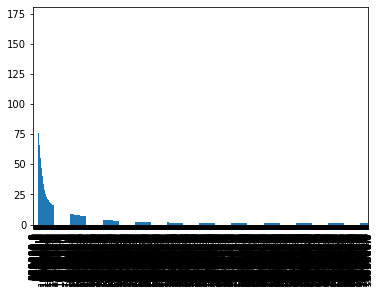

In [18]:
house['price'].value_counts().plot.bar()

In [19]:
# house.hvplot.scatter(x='yr_renovated', y='price')

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Vérification des valeurs manquantes</h3>

<AxesSubplot:>

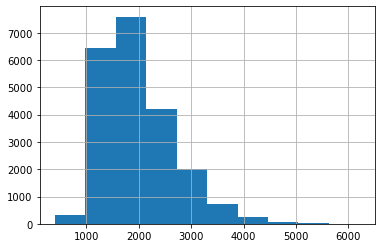

In [20]:
house['sqft_living15'].hist()

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Vérification des valeurs manquantes</h3>

In [21]:
house.groupby('sqft_living15')['id'].nunique()

sqft_living15
399     1
460     2
620     2
670     1
690     2
       ..
5600    1
5610    1
5790    6
6110    1
6210    1
Name: id, Length: 777, dtype: int64

In [22]:
house.groupby('price')['id'].nunique()

price
75000.0      1
78000.0      1
80000.0      1
81000.0      1
82000.0      1
            ..
5350000.0    1
5570000.0    1
6885000.0    1
7062500.0    1
7700000.0    1
Name: id, Length: 4028, dtype: int64

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">3. Prétraitement Des Variables</h1>

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">3.1 Copie et description des colonnes</h3>

In [23]:
khouse = house.copy()
khouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
khouse.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">3.2 Observations des données uniques</h3>

In [25]:
khouse.groupby('grade')['id'].nunique()

grade
1        1
3        3
4       29
5      234
6     1995
7     8896
8     6044
9     2606
10    1130
11     396
12      89
13      13
Name: id, dtype: int64

#### NB:
<p style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Le grade 2 ne comporte aucune observation. On va le retirer de la liste.</p>
<p style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Nous allons combiner les grade 1, 3, 4 et 5.</p>
<p style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Nous allons combiner les grades 11, 12 et 13.</p>

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">3.3 Transformation des Données</h3>

In [26]:
khouse.grade.replace([1, 3, 4], 5, inplace=True)
khouse.grade.replace([12, 13], 11, inplace=True)
khouse['grade'] = khouse['grade'] - 4
khouse.groupby('grade')['id'].nunique()

grade
1     267
2    1995
3    8896
4    6044
5    2606
6    1130
7     498
Name: id, dtype: int64

<p style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Prendre le max entre yr_renovated et yr_built. Si la maison a été renovée, alors on considérera son année de renovation. Dans le cas contraire, on considèrera son année de construction</p>

In [27]:
khouse['yr_renovated'] = np.maximum(khouse['yr_built'], khouse['yr_renovated'])

<p style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Maintenant, conserver seulement l'année dans la date de vente Date</p>

In [28]:
khouse['date'] = khouse.date.apply(lambda x: int(x[:4])) 

<p style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Calculer le nombre d'années entre la dernière rénovation et la vente de la maison et la conserver en tant que date</p>

In [29]:
khouse['date'] = khouse['date'] - khouse['yr_renovated'] + 1

In [30]:
khouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,60,221900.0,3,1.00,1180,5650,1.0,0,0,...,3,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,24,538000.0,3,2.25,2570,7242,2.0,0,0,...,3,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,83,180000.0,2,1.00,770,10000,1.0,0,0,...,2,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,50,604000.0,4,3.00,1960,5000,1.0,0,0,...,3,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,29,510000.0,3,2.00,1680,8080,1.0,0,0,...,4,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [31]:
khouse.groupby('date')['id'].nunique()

date
0       18
1      516
2      330
3      190
4      178
      ... 
112     42
113     31
114     27
115     54
116     21
Name: id, Length: 117, dtype: int64

<p style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Convertir le zipcode en chaine de caractères string</p>

In [32]:
khouse['zipcode'] = khouse['zipcode'].astype(str)

<p style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Conserver seulement les 4 premiers caractères du zipcode</p>

In [33]:
khouse['zipcode'] = khouse['zipcode'].apply(lambda x: x[:4])

In [34]:
khouse.groupby('zipcode')['id'].nunique()

zipcode
9800    2227
9801     606
9802    1819
9803    2258
9804    1048
9805    2553
9806     307
9807    1378
9809     351
9810    1822
9811    2404
9812    1044
9813     748
9814     677
9815     442
9816     514
9817     512
9818     135
9819     591
Name: id, dtype: int64

<p style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Transformer les variables catégorielles (waterfront et zipcode) en dummies</p>

In [35]:
cols = ['waterfront','zipcode']
khouse_dum = pd.get_dummies(khouse, columns=cols)
khouse_dum.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,zipcode_9810,zipcode_9811,zipcode_9812,zipcode_9813,zipcode_9814,zipcode_9815,zipcode_9816,zipcode_9817,zipcode_9818,zipcode_9819
0,7129300520,60,221900.0,3,1.00,1180,5650,1.0,0,3,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,24,538000.0,3,2.25,2570,7242,2.0,0,3,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,83,180000.0,2,1.00,770,10000,1.0,0,3,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

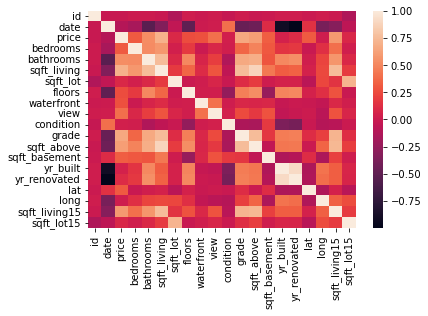

In [36]:
sns.heatmap(khouse.corr())

In [37]:
# sns.pairplot(khouse)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">4 Fonctions d'évaluation et de validation</h1>

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">4.1 Définition des termes importants</h3>

<h4 style="font-family: 'Times New Roman'; letter-spacing: 0.1em;">4.1.1 Mean absolute error ou MAE</h4>

> l'erreur absolue moyenne (MAE) est une mesure des erreurs entre des observations appariées exprimant le même phénomène. Des exemples de Y par rapport à X comprennent des comparaisons de la durée prévue par rapport à l'observation, du temps ultérieur par rapport à l'heure initiale, et une technique de mesure par rapport à une autre technique de mesure.
>Il s'agit donc d'une moyenne arithmétique des erreurs absolues où yi est la prédiction et xi est la vraie valeur.
Le MAE est calculé comme suit: <img width="300px" src="images/mae_function_1.png">
>`source [wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_error)`

<h4 style="font-family: 'Times New Roman'; letter-spacing: 0.1em;">4.1.2 Mean Squared Error ou MSE</h4>

>L'erreur quadratique moyenne (ou MSE) ressemble beaucoup à l'erreur absolue moyenne en ce sens qu'elle donne une idée grossière de l'ampleur de l'erreur.Prendre la racine carrée de l'erreur quadratique moyenne convertit les unités en unités d'origine de la variable de sortie et peut être significative pour la description et la présentation. C'est ce qu'on appelle l'erreur quadratique moyenne racine (ou RMSE).
Le MSE est calculé comme suit: <img width="300px" src="images/mse_function_1.png">
>`source [wikipedia: Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)`

<h4 style="font-family: 'Times New Roman'; letter-spacing: 0.1em;">4.1.3 R^2 Metric</h4>

>La mesure R^2 (ou R Squared) fournit une indication de la qualité de l'ajustement d'un ensemble de prédictions aux valeurs réelles. Dans la littérature statistique, cette mesure est appelée coefficient de détermination.Il s'agit d'une valeur comprise entre 0 et 1 pour un ajustement non ajusté et un ajustement parfait respectivement.
>Le R2 est calculé comme suit: <img width="300px" src="images/r2_function_1.png">
>`source [wikipedia: Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)`

<h4 style="font-family: 'Times New Roman'; letter-spacing: 0.1em;">4.1.4 Root-mean-square deviation ou RMSE</h4>

>L'erreur quadratique moyenne est l'une de ces mesures d'erreur pour juger de la précision et du taux d'erreur de tout algorithme d'apprentissage automatique pour un problème de régression.
Ainsi, MSE est une fonction de risque qui nous aide à déterminer la différence quadratique moyenne entre la valeur prédite et la valeur réelle d'une caractéristique ou d'une variable.
Le RMSE est calculé comme suit: <img width="300px" src="images/rmse_function_1.png">
>`Plus d'info sur [wikipedia: Root-mean-square deviation](https://en.wikipedia.org/wiki/Root-mean-square_deviation)`

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">4.2 Fonction Évaluation, Validation et Affichage</h3>

In [38]:
# <p style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Définir plusieurs fonctions d'évaluation pour plus de commodité</p>

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('_____________________________________\n')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">5 Séparation du jeu de données</h1>

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">5.1 Sélection des features et targets (attributs)</h3>

In [39]:
X = khouse_dum.drop(['id', 'sqft_living', 'sqft_lot', 'price', 'lat', 'long', 'yr_built', 'yr_renovated'], axis=1)
y = khouse_dum['price']

In [40]:
X.head()

,date,bedrooms,bathrooms,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,...,zipcode_9810,zipcode_9811,zipcode_9812,zipcode_9813,zipcode_9814,zipcode_9815,zipcode_9816,zipcode_9817,zipcode_9818,zipcode_9819
0,60,3,1.00,1.0,0,3,3,1180,0,1340,...,0,0,0,0,0,0,0,1,0,0
1,24,3,2.25,2.0,0,3,3,2170,400,1690,...,0,0,1,0,0,0,0,0,0,0
2,83,2,1.00,1.0,0,3,2,770,0,2720,...,0,0,0,0,0,0,0,0,0,0
3,50,4,3.00,1.0,0,5,3,1050,910,1360,...,0,0,0,1,0,0,0,0,0,0
4,29,3,2.00,1.0,0,3,4,1680,0,1800,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">5.2 Train Test Split</h3>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.head()

,date,bedrooms,bathrooms,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,...,zipcode_9810,zipcode_9811,zipcode_9812,zipcode_9813,zipcode_9814,zipcode_9815,zipcode_9816,zipcode_9817,zipcode_9818,zipcode_9819
6325,32,3,1.75,1.0,0,4,5,1780,0,2750,...,0,0,0,0,0,0,0,0,0,0
13473,87,2,1.00,1.0,0,3,2,800,200,1270,...,0,1,0,0,0,0,0,0,0,0
17614,74,3,1.00,1.5,0,3,2,990,90,1170,...,0,0,0,0,1,0,0,0,0,0
16970,39,3,2.25,1.0,0,4,3,1280,810,1800,...,0,0,0,0,0,0,0,0,0,0
20868,9,2,2.50,2.0,0,3,4,1446,295,2090,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_test.head()

,date,bedrooms,bathrooms,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,...,zipcode_9810,zipcode_9811,zipcode_9812,zipcode_9813,zipcode_9814,zipcode_9815,zipcode_9816,zipcode_9817,zipcode_9818,zipcode_9819
735,29,4,2.25,2.0,0,4,4,2070,0,2390,...,0,0,0,0,0,0,0,0,0,0
2830,38,5,3.00,1.0,0,5,4,1830,1070,2370,...,0,1,0,0,0,0,0,0,0,0
4106,18,4,2.50,2.0,2,3,7,3770,0,3710,...,0,0,0,0,0,0,0,0,0,0
16218,26,3,3.50,2.0,2,3,7,4560,0,4050,...,0,0,0,0,0,0,0,0,0,0
19964,11,3,2.50,2.0,0,3,5,2550,0,2250,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X_train.columns

Index(['date', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'waterfront_0', 'waterfront_1', 'zipcode_9800', 'zipcode_9801',
       'zipcode_9802', 'zipcode_9803', 'zipcode_9804', 'zipcode_9805',
       'zipcode_9806', 'zipcode_9807', 'zipcode_9809', 'zipcode_9810',
       'zipcode_9811', 'zipcode_9812', 'zipcode_9813', 'zipcode_9814',
       'zipcode_9815', 'zipcode_9816', 'zipcode_9817', 'zipcode_9818',
       'zipcode_9819'],
      dtype='object')

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6. 📈 Entrainement des modèles linéaires</h1>

# Linear Regression

> La régression linéaire est un algorithme simple en machine learning, elle peut être entrainée de différentes manières. Dans la suite, nous entrainerons simplement les modèles suivants:

> 1. Linear Regression (Régression Linéaire)
> 2. Robust Regression (Régression Robuste)
> 3. Ridge Regression (Régression Crêtre)
> 4. LASSO Regression (Régression Lasso)
> 5. Elastic Net (FIllet Élastique)
> 6. Polynomial Regression (Régression Polynomiale)
> 7. Stochastic Gradient Descent (Descente de Gradiant)
> 8. Artficial Neural Network
> 9. Support Vector Machine (SVM)
> 10. Random Forest Regressor (Forêt Aléatoire)
> 11. XGBoost Regressor (Régression XGBoost)

# 📦 Préparation des données pour la Régression Linéaire
> La régression linéaire a été longuement étudiée et il existe de nombreuses publications sur la façon dont les données doivent être structurées pour tirer le meilleur parti du modèle.

> En tant que tel, il y a beaucoup de sophistication lorsque l'on parle de ces exigences et attentes, ce qui peut être intimidant. En pratique, On peut utiliser ces règles davantage comme des règles empiriques lorsqu'on utilise la régression des moindres carrés ordinaires, l'implémentation la plus courante de la régression linéaire.

> Essayons différentes préparations de nos données en utilisant ces heuristiques et voyons ce qui fonctionne le mieux pour notre problème.
- **Linear Assumption.** La régression linéaire suppose que la relation entre votre entrée et votre sortie est linéaire. Il ne supporte rien d'autre. Cela peut paraître évident, mais il est bon de s'en souvenir lorsque vous avez beaucoup d'attributs. Vous devrez peut-être transformer les données pour rendre la relation linéaire (e.g. log transform for an exponential relationship).
- **Remove Noise.** La régression linéaire suppose que vos variables d'entrée et de sortie ne sont pas bruyantes. Envisagez d'utiliser des opérations de nettoyage des données qui vous permettent de mieux exposer et clarifier le signal dans vos données. Ceci est le plus important pour la variable de sortie et vous souhaitez supprimer les valeurs aberrantes dans la variable de sortie (y) si possible.
- **Remove Collinearity.** La régression linéaire sur-ajustera nos données lorsque nous avons des variables d'entrée fortement corrélées. Envisageons de calculer des corrélations par paires pour nos données d'entrée et de supprimer les plus corrélées.
- **Gaussian Distributions.** La régression linéaire fera des prédictions plus fiables si nos variables d'entrée et de sortie ont une distribution gaussienne. Nous pouvons obtenir des avantages en utilisant des transformations (par exemple, log ou BoxCox) sur nos variables pour rendre leur distribution plus gaussienne.
- **Rescale Inputs:** La régression linéaire fera souvent des prédictions plus fiables si nous remettons à l'échelle les variables d'entrée à l'aide de la standardisation ou de la normalisation.

In [46]:

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.1 ✔️ Linear Regression</h3>

In [47]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

#### ✔️ Model Evaluation
Évaluons le modèle en vérifiant ses coefficients et comment nous pouvons les interpréter.

In [48]:
print(lin_reg.intercept_)

537764.1075039521


In [49]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
date,4.918497e+04
bedrooms,-3.240366e+04
bathrooms,2.676821e+04
floors,-1.393338e+04
view,3.475740e+04
condition,1.669594e+04
grade,1.026470e+05
sqft_above,1.634002e+05
sqft_basement,6.866636e+04
sqft_living15,3.497764e+04


> Interprétation des coefficients:
>- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52**.
>- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28**.
>- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67**.
>- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80**.
>- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15**.

Does this make sense? Probably not because I made up this data.

In [50]:
pred = lin_reg.predict(X_test)

In [51]:
# pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

In [52]:
# pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

####  Metriques d'Evaluation des Régressions


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) est la moyenne absolue des erreurs:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) est la moyenne au carré des erreurs:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) est la racine carrée de la moyenne au carré des erreurs:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparaison de ces mesures:
- **MAE** est le plus facile à comprendre, car c'est l'erreur moyenne.
- **MSE** est plus populaire que MAE, car MSE "punit" les erreurs plus importantes, ce qui a tendance à être utile dans le monde réel.
- **RMSE** est encore plus populaire que MSE, car RMSE est interprétable dans les unités "y".

> Ce sont toutes des **fonctions de perte**, car nous voulons les minimiser.

In [53]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Évaluation d\'entrainement (Train set):\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Évaluation de test (Test set):\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Évaluation d'entrainement (Train set):
_____________________________________
MAE: 134675.11518149197
MSE: 43208402972.70795
RMSE: 207866.31033601367
R2 Square 0.669277754032573
_____________________________________

Évaluation de test (Test set):
_____________________________________
MAE: 137798.1016708638
MSE: 49215701464.327194
RMSE: 221846.12113879115
R2 Square 0.6744491877776299
_____________________________________



<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.2 ✔️ Robust Regression</h3>

#### Robust Regression

> La régression robuste est une forme d'analyse de régression conçue pour surmonter certaines limites des méthodes paramétriques et non paramétriques traditionnelles. Les méthodes de régression robustes sont conçues pour ne pas être trop affectées par les violations des hypothèses par le processus de génération de données sous-jacent.

> Un cas dans lequel une estimation robuste doit être envisagée est lorsqu'il y a une forte suspicion de `heteroscedasticity`.

> Une situation courante dans laquelle une estimation robuste est utilisée se produit lorsque les données contiennent des valeurs aberrantes. En présence de valeurs aberrantes qui ne proviennent pas du même processus de génération de données que le reste des données, l'estimation par les moindres carrés est inefficace et peut être biaisée. Étant donné que les prédictions des moindres carrés sont entraînées vers les valeurs aberrantes et que la variance des estimations est artificiellement gonflée, le résultat est que les valeurs aberrantes peuvent être masquées. (Dans de nombreuses situations, y compris certains domaines de la géostatistique et des statistiques médicales, ce sont précisément les valeurs aberrantes qui nous intéressent.)

##### Random Sample Consensus - RANSAC

> Random sample consensus (`RANSAC`) est une méthode itérative pour estimer les paramètres d'un modèle mathématique à partir d'un ensemble de données observées contenant des valeurs aberrantes, lorsque les valeurs aberrantes ne doivent avoir aucune influence sur les valeurs des estimations. Par conséquent, il peut également être interprété comme une méthode de détection des valeurs aberrantes.

> Une hypothèse de base est que les données se composent de « inliers », c'est-à-dire de données dont la distribution peut être expliquée par un ensemble de paramètres de modèle, bien qu'elles puissent être sujettes au bruit, et de « outliers » qui sont des données qui ne correspondent pas au modèle. Les valeurs aberrantes peuvent provenir, par exemple, de valeurs extrêmes du bruit ou de mesures erronées ou d'hypothèses erronées sur l'interprétation des données. RANSAC suppose également que, étant donné un ensemble (généralement petit) d'inliers, il existe une procédure qui peut estimer les paramètres d'un modèle qui explique ou adapte de manière optimale ces données.

In [54]:
model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Évaluation d\'entrainement (Train set):\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Évaluation de test (Test set):\n_____________________________________')
print_evaluate(y_test, test_pred)


results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Évaluation d'entrainement (Train set):
_____________________________________
MAE: 150369.88799370444
MSE: 66198132366.03741
RMSE: 257289.977197009
R2 Square 0.4933116359617946
_____________________________________

Évaluation de test (Test set):
_____________________________________
MAE: 153585.72735589772
MSE: 75738673060.87503
RMSE: 275206.6006855123
R2 Square 0.49900568725035277
_____________________________________



<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.3 ✔️ Ridge Regression</h3>

#### Ridge Regression

> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

> La régression Ridge résout certains des problèmes des **moindres carrés ordinaires** en imposant une pénalité sur la taille des coefficients. Les coefficients de crête minimisent une somme résiduelle des carrés pénalisée,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

> $\alpha>=0$ est un paramètre de complexité qui contrôle la quantité de retrait : plus la valeur de $\alpha$ est élevée, plus la quantité de retrait est grande et donc les coefficients deviennent plus robustes à la colinéarité.

> La régression Ridge est un modèle pénalisé L2. Ajouter la somme au carré des poids à la fonction de coût des moindres carrés.
***

In [55]:
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Évaluation d\'entrainement (Train set):\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Évaluation de test (Test set):\n_____________________________________')
print_evaluate(y_test, test_pred)


results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Évaluation d'entrainement (Train set):
_____________________________________
MAE: 134407.47383489835
MSE: 43212516518.086845
RMSE: 207876.2047904638
R2 Square 0.669246268467891
_____________________________________

Évaluation de test (Test set):
_____________________________________
MAE: 137520.8009407524
MSE: 49252144118.606
RMSE: 221928.24092171327
R2 Square 0.6742081278039423
_____________________________________



<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.4 ✔️ LASSO Regression</h3>

> Un modèle linéaire qui estime les coefficients creux.

> Mathématiquement, il s'agit d'un modèle linéaire formé avec $\ell_1$ préalable comme régularisant. La fonction objectif à minimiser est:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

> L'estimation au lasso résout donc la minimisation de la pénalité des moindres carrés avec $\alpha \big|\big|w\big|\big|_1$ ajouté, où $\alpha$ est une constante et $\big|\big|w\big|\big|_1$ équivalent de $\ell_1-norm$ du vecteur paramètre.
***

In [56]:
model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Évaluation d\'entrainement (Train set):\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Évaluation de test (Test set):\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Évaluation d'entrainement (Train set):
_____________________________________
MAE: 135266.0297513442
MSE: 43928615475.37715
RMSE: 209591.54437948385
R2 Square 0.6637651620349694
_____________________________________

Évaluation de test (Test set):
_____________________________________
MAE: 138273.92235075973
MSE: 50139854389.337555
RMSE: 223919.30329772277
R2 Square 0.6683361237268641
_____________________________________



<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.5 ✔️ Elastic Net</h3>

> Un modèle de régression linéaire formé avec L1 et L2 a priori comme régularisateur.
> 
> Cette combinaison permet d'apprendre un modèle creux où peu de poids sont non nuls comme Lasso, tout en conservant les propriétés de régularisation de Ridge.
> Un avantage pratique du compromis entre Lasso et Ridge est qu'il permet à Elastic-Net d'hériter d'une partie de la stabilité de Ridge en rotation.
> La fonction objectif à minimiser est dans ce cas

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$
***

In [57]:
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Évaluation d\'entrainement (Train set):\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Évaluation de test (Test set):\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Évaluation d'entrainement (Train set):
_____________________________________
MAE: 134226.10677084172
MSE: 43220282606.58572
RMSE: 207894.88355076397
R2 Square 0.6691868259045464
_____________________________________

Évaluation de test (Test set):
_____________________________________
MAE: 137337.10315867368
MSE: 49283010266.23141
RMSE: 221997.77085869896
R2 Square 0.6740039551693837
_____________________________________



<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.6 ✔️ Polynomial Regression</h3>

> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> Un modèle courant dans l'apprentissage automatique consiste à utiliser des modèles linéaires entraînés sur des fonctions non linéaires des données. Cette approche maintient les performances généralement rapides des méthodes linéaires, tout en leur permettant de s'adapter à une gamme de données beaucoup plus large.

> Par exemple, une régression linéaire simple peut être étendue en construisant des caractéristiques polynomiales à partir des coefficients. Dans le cas de la régression linéaire standard, vous pourriez avoir un modèle qui ressemble à ceci pour des données bidimensionnelles :

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> Si nous voulons ajuster un paraboloïde aux données au lieu d'un plan, nous pouvons combiner les caractéristiques dans des polynômes du second ordre, de sorte que le modèle ressemble à ceci :

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> Le constat (parfois surprenant) est qu'il s'agit toujours d'un modèle linéaire : pour le voir, imaginez créer une nouvelle variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> Avec ce ré-étiquetage des données, notre problème peut s'écrire

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> Nous voyons que la régression polynomiale résultante appartient à la même classe de modèles linéaires que nous avions considérés ci-dessus (c'est-à-dire que le modèle est linéaire en w) et peut être résolue par les mêmes techniques. En considérant des ajustements linéaires dans un espace de dimension supérieure construit avec ces fonctions de base, le modèle a la flexibilité de s'adapter à une gamme de données beaucoup plus large.
***

In [58]:
poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Évaluation d\'entrainement (Train set):\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Évaluation de test (Test set):\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Évaluation d'entrainement (Train set):
_____________________________________
MAE: 108115.29248120301
MSE: 26299903543.101734
RMSE: 162172.4500126385
R2 Square 0.7986974160096763
_____________________________________

Évaluation de test (Test set):
_____________________________________
MAE: 116020.53735831598
MSE: 35782108470.15522
RMSE: 189161.59353884505
R2 Square 0.7633093884899437
_____________________________________



<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.7 ✔️ Stochastic Gradient Descent</h3>

> Gradient Descent est un algorithme d'optimisation très générique capable de trouver des solutions optimales à un large éventail de problèmes. L'idée générale de Gradient Sescent est de modifier les paramètres de manière itérative afin de minimiser une fonction de coût. Gradient Descent mesure le gradient local de la fonction d'erreur par rapport au vecteur de paramètres, et il va dans le sens du gradient descendant. Une fois que le gradient est nul, vous avez atteint un minimum.

In [59]:
sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Évaluation d\'entrainement (Train set):\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Évaluation de test (Test set):\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Évaluation d'entrainement (Train set):
_____________________________________
MAE: 134678.7942775422
MSE: 43208369411.31969
RMSE: 207866.2296076967
R2 Square 0.669278010915423
_____________________________________

Évaluation de test (Test set):
_____________________________________
MAE: 137801.0040647482
MSE: 49215768214.04807
RMSE: 221846.27158022753
R2 Square 0.6744487462432172
_____________________________________



<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.8 ✔️ Artficial Neural Network</h3>

In [60]:
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

# model = Sequential()

# model.add(Dense(X_train.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Dense(64, activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Dense(128, activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1))

# model.compile(optimizer=Adam(0.00001), loss='mse')

# r = model.fit(X_train, y_train,
#               validation_data=(X_test,y_test),
#               batch_size=1,
#               epochs=100)

In [61]:
# pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

In [62]:
# pd.DataFrame(r.history)

In [63]:
# pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

In [64]:
# test_pred = model.predict(X_test)
# train_pred = model.predict(X_train)

# print('Évaluation d\'entrainement (Train set):\n_____________________________________')
# print_evaluate(y_train, train_pred)

# print('Évaluation de test (Test set):\n_____________________________________')
# print_evaluate(y_test, test_pred)

# results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
#                             columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
# results_df = results_df.append(results_df_2, ignore_index=True)

<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">69. ✔️ Random Forest Regressor</h3>

In [65]:
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Évaluation d\'entrainement (Train set):\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Évaluation de test (Test set):\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Évaluation d'entrainement (Train set):
_____________________________________
MAE: 37949.569963151815
MSE: 4055473502.2738295
RMSE: 63682.599682125336
R2 Square 0.968958924355974
_____________________________________

Évaluation de test (Test set):
_____________________________________
MAE: 110060.05818266343
MSE: 43645465622.05538
RMSE: 208914.9722304636
R2 Square 0.7112950468991572
_____________________________________



<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.10 ✔️ Support Vector Regression</h3>

In [66]:
svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Évaluation d\'entrainement (Train set):\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Évaluation de test (Test set):\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Évaluation d'entrainement (Train set):
_____________________________________
MAE: 86585.6779477376
MSE: 24788313484.69963
RMSE: 157443.04838480367
R2 Square 0.8102673057696043
_____________________________________

Évaluation de test (Test set):
_____________________________________
MAE: 107238.74930764046
MSE: 37862247485.34685
RMSE: 194582.23836040855
R2 Square 0.7495497360663788
_____________________________________



<h3 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">6.11 ✔️ XGBoost Regressor</h3>

In [67]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)

test_pred = xgb.predict(X_test)
train_pred = xgb.predict(X_train)

print('Évaluation d\'entrainement (Train set):\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Évaluation de test (Test set):\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["XGBoost Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Évaluation d'entrainement (Train set):
_____________________________________
MAE: 90483.41596117699
MSE: 15965638384.016558
RMSE: 126355.2071899554
R2 Square 0.8777971084003987
_____________________________________

Évaluation de test (Test set):
_____________________________________
MAE: 112384.6667172681
MSE: 40122673634.830284
RMSE: 200306.44930912805
R2 Square 0.7345975247387315
_____________________________________



<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">7. Comparaison des modèles</h1>

<AxesSubplot:ylabel='Model'>

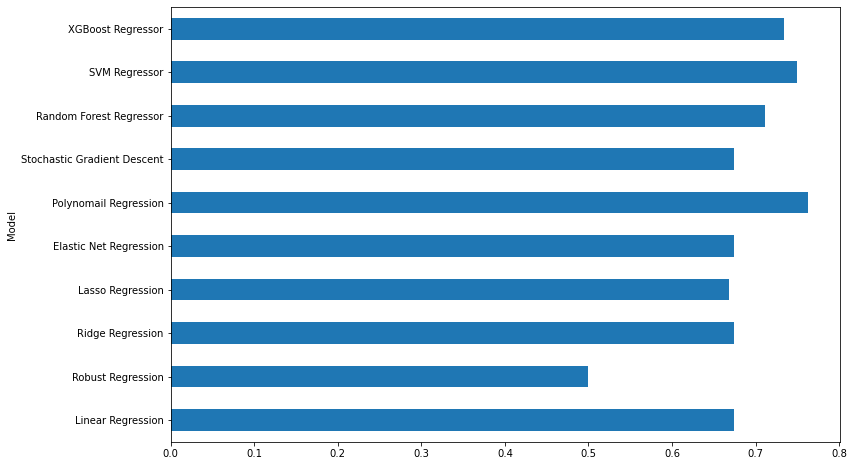

In [84]:
results_df.set_index('R2 Square', inplace=False)
results_df['R2 Square'].plot(kind='barh',figsize=(12,8))

<AxesSubplot:ylabel='Model'>

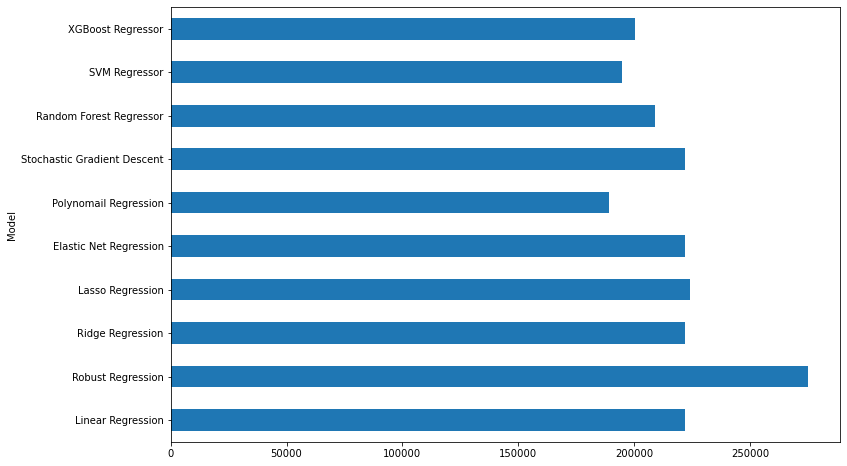

In [85]:
results_df.set_index('RMSE', inplace=False)
results_df['RMSE'].plot(kind='barh',figsize=(12,8))

<AxesSubplot:ylabel='Model'>

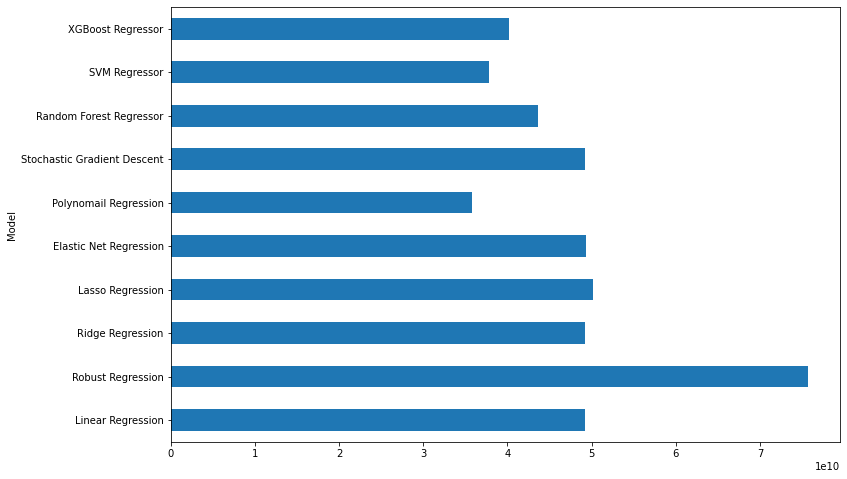

In [86]:
results_df.set_index('MSE', inplace=False)
results_df['MSE'].plot(kind='barh',figsize=(12,8))

<AxesSubplot:ylabel='Model'>

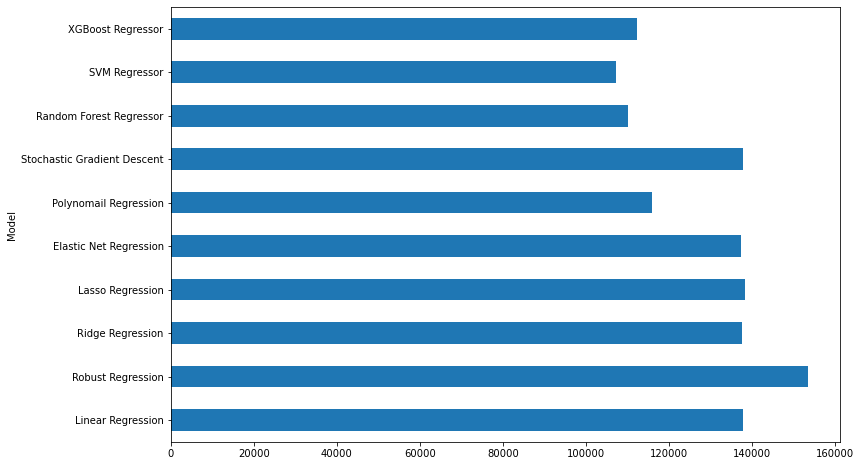

In [87]:
results_df.set_index('MAE', inplace=False)
results_df['MAE'].plot(kind='barh',figsize=(12,8))

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">8. Sauvegarde des modèles</h1>